<a href="https://colab.research.google.com/github/LakshyaR36/LakshyaR36/blob/main/satellite_imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from matplotlib import pyplot as plt
import random

In [2]:
minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()

In [3]:
!pip install patchify

In [4]:
import os
from PIL import Image
from patchify import patchify

In [5]:
!ls -lah '/content/drive/MyDrive/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 Aug 30 11:23  classes.json
drwx------ 4 root root 4.0K Aug 30 11:31 'Tile 1'
drwx------ 4 root root 4.0K Aug 30 11:31 'Tile 2'
drwx------ 4 root root 4.0K Aug 30 11:31 'Tile 3'
drwx------ 4 root root 4.0K Aug 30 11:31 'Tile 4'
drwx------ 4 root root 4.0K Aug 30 11:31 'Tile 5'
drwx------ 4 root root 4.0K Aug 30 11:31 'Tile 6'
drwx------ 4 root root 4.0K Aug 30 11:31 'Tile 7'
drwx------ 4 root root 4.0K Aug 30 11:31 'Tile 8'


In [6]:
import pandas as pd
import numpy as np


In [7]:
dataset_root = '/content/drive/MyDrive/Semantic segmentation dataset'

In [8]:
for path , subdirs , files in os.walk(dataset_root):
  dir_name = path.split(os.path.sep)[-1]
  if dir_name == 'images':
    images = os.listdir(path)
    print(images)
    for i , image_name in enumerate(images):
      a = True

['image_part_006.jpg', 'image_part_003.jpg', 'image_part_002.jpg', 'image_part_007.jpg', 'image_part_001.jpg', 'image_part_005.jpg', 'image_part_004.jpg', 'image_part_009.jpg', 'image_part_008.jpg']
['image_part_008.jpg', 'image_part_004.jpg', 'image_part_002.jpg', 'image_part_007.jpg', 'image_part_009.jpg', 'image_part_001.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_003.jpg']
['image_part_003.jpg', 'image_part_001.jpg', 'image_part_002.jpg', 'image_part_005.jpg', 'image_part_004.jpg', 'image_part_008.jpg', 'image_part_007.jpg', 'image_part_009.jpg', 'image_part_006.jpg']
['image_part_002.jpg', 'image_part_001.jpg', 'image_part_009.jpg', 'image_part_008.jpg', 'image_part_004.jpg', 'image_part_003.jpg', 'image_part_005.jpg', 'image_part_007.jpg', 'image_part_006.jpg']
['image_part_003.jpg', 'image_part_002.jpg', 'image_part_006.jpg', 'image_part_005.jpg', 'image_part_007.jpg', 'image_part_004.jpg', 'image_part_008.jpg', 'image_part_009.jpg', 'image_part_001.jpg']
['ima

In [9]:
import cv2

In [10]:
image_batch_size = 256

In [11]:
image = cv2.imread(f'{dataset_root}/Tile 2/images/image_part_001.jpg',1)

In [12]:
image_patches = patchify(image , (image_batch_size , image_batch_size , 3) , step = image_batch_size)

In [13]:
type(Image.fromarray(image))

PIL.Image.Image

In [14]:
image.shape

(544, 509, 3)

In [15]:
image.shape[0]//image_batch_size

2

In [16]:
image_dataset = []
mask_dataset = []
for image_type in ['images','masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image ,cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_batch_size)*image_batch_size
        size_y = (image.shape[1]//image_batch_size)*image_batch_size
        ##print("{} --- {} - {}".format(image.shape , size_x , size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0,size_x,size_y))
        #print("({} , {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image , (image_batch_size , image_batch_size ,3) , step = image_batch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1 , individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 

In [17]:
print(len(image_dataset))
print(len(mask_dataset))

936
936


In [18]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

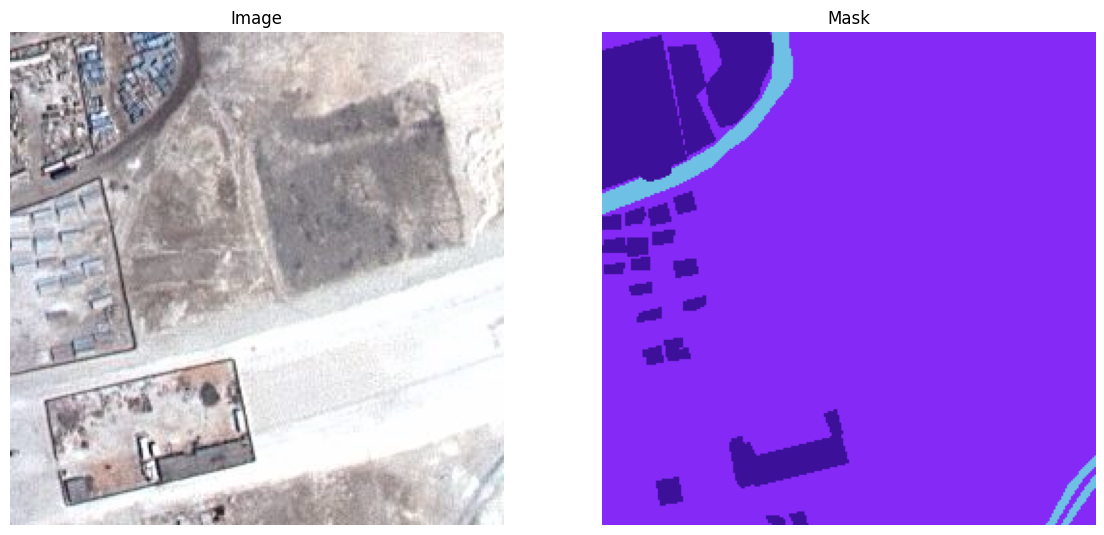

In [19]:
import random
import matplotlib.pyplot as plt

random_image_id = random.randint(0, len(image_dataset)-1)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.imshow(image_dataset[random_image_id])
plt.title("Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask_dataset[random_image_id])
plt.title("Mask")
plt.axis("off")

plt.show()


In [20]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4)))
print(class_water)

class_Unlabeled = '#9B9B9B'
class_Unlabeled = class_Unlabeled.lstrip('#')
class_Unlabeled = np.array(tuple(int(class_Unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_Unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [21]:
label = individual_patched_mask

In [22]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape , dtype=np.uint8)
  label_segment[np.all(label==class_water , axis=-1)] = 0
  label_segment[np.all(label==class_land , axis=-1)] = 1
  label_segment[np.all(label==class_road , axis=-1)] = 2
  label_segment[np.all(label==class_building , axis=-1)] = 3
  label_segment[np.all(label==class_vegetation , axis=-1)] = 4
  label_segment[np.all(label==class_Unlabeled , axis=-1)] = 5
  label_segment = label_segment[:,:,0]
  print(label_segment)
  return label_segment

In [23]:
mask_dataset.shape

(936, 256, 256, 3)

In [24]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

Streaming output truncated to the last 5000 lines.
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [2 2 2 ... 3 3 3]
 [2 2 2 ... 3 3 3]
 [2 2 2 ... 3 3 3]]
[[1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 ...
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]]
[[3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[2 2 2 ... 3 3 3]
 [2 2 2 ... 3 3 3]
 [2 2 2 ... 3 3 3]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]]
[[2 2 2 ... 4 4 4]
 [2 2 1 ... 4 4 4]
 [2 2 1 ... 4 4 4]
 ...
 [3 1 1 

In [25]:
print(len(labels))

936


In [26]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
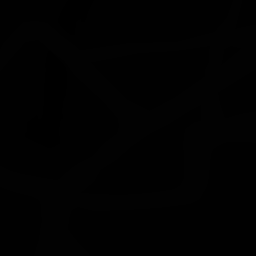

In [27]:
labels[3]

In [28]:
labels=np.expand_dims(labels , axis = 3)

In [29]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [30]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [31]:
total_classes = len(np.unique(labels))

In [32]:
total_classes

6

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
labels_categorical_dataset = to_categorical(labels , num_classes=total_classes)

In [35]:
labels_categorical_dataset

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [36]:
master_training_dataset = image_dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train , x_test , y_train , y_test = train_test_split(master_training_dataset , labels_categorical_dataset , test_size=0.15 , random_state=100)

In [39]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [40]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [41]:
from keras.models import Model
from keras.layers import Input , Conv2D , MaxPooling2D, UpSampling2D , Conv2DTranspose
from keras.layers import concatenate , BatchNormalization , Dropout , Lambda

In [42]:
from keras import backend as K

In [43]:
def jaccard_coef(y_true , y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten+y_pred_flatten)
  final_coef_value = intersection + 1.0 / (K.sum(y_true_flatten)+K.sum(y_pred_flatten)-intersection+1.0)
  return final_coef_value

In [44]:
def multui_unet_model(n_classes=5 , image_height=256 , image_width=256 , image_channels=1):
    inputs = Input((image_height , image_width , image_channels))
    source_input = inputs
    # Encoder
    c1 = Conv2D(16 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(c5)

    # Decoder
    u6 = Conv2DTranspose(128 , (2,2) , strides=(2,2) , padding="same")(c5)
    u6 = concatenate([u6,c4])
    c6 = Conv2D(128 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(c6)

    u7 = Conv2DTranspose(64 , (2,2) , strides=(2,2) , padding="same")(c6)
    u7 = concatenate([u7,c3])
    c7 = Conv2D(64 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(c7)

    u8 = Conv2DTranspose(32 , (2,2) , strides=(2,2) , padding="same")(c7)
    u8 = concatenate([u8,c2])
    c8 = Conv2D(32 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(c8)

    u9 = Conv2DTranspose(16 , (2,2) , strides=(2,2) , padding="same")(c8)
    u9 = concatenate([u9,c1], axis=3)
    c9 = Conv2D(16 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16 , (3,3) , activation="relu" , kernel_initializer="he_normal" , padding="same")(c9)

    # Output
    outputs = Conv2D(n_classes , (1,1) , activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model


In [45]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import mixed_precision

# Enable mixed precision (cuts GPU memory ~50%)
mixed_precision.set_global_policy('mixed_float16')

def lite_unet(n_classes=5, image_height=256, image_width=256, image_channels=1):
    inputs = Input((image_height, image_width, image_channels))

    # Encoder
    c1 = Conv2D(8, 3, activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(8, 3, activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D(2)(c1)

    c2 = Conv2D(16, 3, activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(16, 3, activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D(2)(c2)

    c3 = Conv2D(32, 3, activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.1)(c3)
    c3 = Conv2D(32, 3, activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D(2)(c3)

    c4 = Conv2D(64, 3, activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.1)(c4)
    c4 = Conv2D(64, 3, activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D(2)(c4)

    c5 = Conv2D(128, 3, activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.1)(c5)
    c5 = Conv2D(128, 3, activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    # Decoder
    u6 = Conv2DTranspose(64, 2, strides=2, padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(64, 3, activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.1)(c6)
    c6 = Conv2D(64, 3, activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(32, 2, strides=2, padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(32, 3, activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.1)(c7)
    c7 = Conv2D(32, 3, activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(16, 2, strides=2, padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(16, 3, activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(16, 3, activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(8, 2, strides=2, padding="same")(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(8, 3, activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(8, 3, activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, 1, activation="softmax", dtype="float32")(c9)

    model = Model(inputs, outputs)
    return model

# Example usage
model = lite_unet(n_classes=5, image_height=256, image_width=256, image_channels=1)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │         80 │ input_layer[0][0] │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │        584 │ dropout[0][0]     │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      1,168 │ max_pooling2d[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      2,320 │ dropout_1[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │      9,248 │ dropout_2[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │     36,928 │ dropout_3[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 485,709 (1.85 MB)

 Trainable params: 485,709 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
metrics = ["accuracy" , jaccard_coef]

In [47]:
def get_deep_learning_model():
  return multui_unet_model(
      n_classes = total_classes ,
      image_height = image_height ,
      image_width = image_width ,
      image_channels = image_channels
  )

In [48]:
model = get_deep_learning_model()

In [49]:
model.get_config()

{'name': 'functional_1',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_layer_1'},
   'registered_name': None,
   'name': 'input_layer_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d_19',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'mixed_float16'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'modu

In [50]:
weights = [0.166 , 0.166 , 0.166 , 0.166 , 0.166 , 0.166]

In [51]:
!pip install segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.8 MB/s eta 0:00:00


In [52]:
import os
import tensorflow as tf   # import TensorFlow first

# Tell segmentation_models to use tf.keras
os.environ['SM_FRAMEWORK'] = 'tf.keras'

import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [53]:
dice_loss = sm.losses.DiceLoss(weights)

In [54]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [55]:
total_loss = dice_loss+(1 * focal_loss)

In [56]:
import tensorflow as tf

In [57]:
tf.keras.backend.clear_session()

In [58]:
model.compile(optimizer='adam' , loss = total_loss , metrics = metrics)

In [59]:
model

<Functional name=functional_1, built=True>

In [60]:
print(x_train.shape, y_train.shape)


(795, 256, 256, 3) (795, 256, 256, 6)


In [61]:
print(x_test.shape, y_test.shape)


(141, 256, 256, 3) (141, 256, 256, 6)


In [62]:
import tensorflow as tf
import gc

tf.keras.backend.clear_session()

gc.collect()


0

In [63]:
import tensorflow as tf
import numpy as np

IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 25

def resize_in_batches(x, y):
    x_resized, y_resized = [], []
    for i in range(0, len(x), BATCH_SIZE):
        xb = tf.image.resize(x[i:i+BATCH_SIZE], (IMG_HEIGHT, IMG_WIDTH))
        yb = tf.image.resize(y[i:i+BATCH_SIZE], (IMG_HEIGHT, IMG_WIDTH), method='nearest')
        x_resized.append(xb)
        y_resized.append(yb)
    x_final = tf.concat(x_resized, axis=0)
    y_final = tf.concat(y_resized, axis=0)
    return x_final, y_final

x_train_resized, y_train_resized = resize_in_batches(x_train, y_train)
x_test_resized, y_test_resized   = resize_in_batches(x_test, y_test)


In [64]:
y_train_sparse = np.argmax(y_train_resized, axis=-1)
y_test_sparse  = np.argmax(y_test_resized,  axis=-1)


In [65]:
x_train_resized = x_train_resized / 255.0
x_test_resized  = x_test_resized / 255.0


In [66]:
print(x_train_resized.shape, y_train_sparse.shape)
print(x_test_resized.shape, y_test_sparse.shape)


(795, 128, 128, 3) (795, 128, 128)
(141, 128, 128, 3) (141, 128, 128)


In [67]:

import tensorflow as tf
import numpy as np


train_ds = tf.data.Dataset.from_tensor_slices((x_train_resized, y_train_sparse))
train_ds = train_ds.shuffle(200).batch(1).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test_resized, y_test_sparse))
test_ds = test_ds.batch(1).prefetch(tf.data.AUTOTUNE)


In [68]:
import tensorflow as tf

def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=6)
    y_pred = tf.nn.softmax(y_pred, axis=-1)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1,2,3])
    dice = (2 * intersection + smooth) / (union + smooth)
    return 1 - tf.reduce_mean(dice)

def focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=6)
    y_pred = tf.nn.softmax(y_pred, axis=-1)
    cross_entropy = -y_true * tf.math.log(tf.clip_by_value(y_pred,1e-6,1.0))
    loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
    return tf.reduce_mean(loss)

def combined_loss(y_true, y_pred):
    return dice_loss(y_true, y_pred) + focal_loss(y_true, y_pred)


In [69]:
model = lite_unet(n_classes=6, image_height=128, image_width=128, image_channels=3)
model.compile(
    optimizer='adam',
    loss=combined_loss,
    metrics=['accuracy']
)


In [70]:
def augment(x, y):

    y = tf.expand_dims(y, axis=-1)

    x = tf.image.random_flip_left_right(x)
    y = tf.image.random_flip_left_right(y)


    y = tf.squeeze(y, axis=-1)

    return x, y


In [75]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


def lite_unet(n_classes=6, image_height=128, image_width=128, image_channels=3):
    inputs = Input((image_height, image_width, image_channels))


    c1 = Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2,2))(c3)


    c4 = Conv2D(128, (3,3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation='relu', padding='same')(c4)


    u5 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(64, (3,3), activation='relu', padding='same')(u5)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(64, (3,3), activation='relu', padding='same')(c5)

    u6 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(32, (3,3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(32, (3,3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(16, (3,3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(16, (3,3), activation='relu', padding='same')(c7)

    outputs = Conv2D(n_classes, (1,1), activation='softmax')(c7)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model


model = lite_unet(n_classes=6, image_height=128, image_width=128, image_channels=3)
model.compile(
    optimizer=Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

BATCH_SIZE = 1

train_ds = tf.data.Dataset.from_tensor_slices((x_train_resized, y_train_sparse))
train_ds = train_ds.shuffle(200).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test_resized, y_test_sparse))
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'unet_baseline.h5', save_best_only=True, monitor='val_accuracy', mode='max'
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=150,
    callbacks=[checkpoint_cb]
)

Epoch 1/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5303 - loss: 1.5548

795/795 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5303 - loss: 1.5547 - val_accuracy: 0.4782 - val_loss: 1.4458
Epoch 2/150
791/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5426 - loss: 1.2624

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5425 - loss: 1.2621 - val_accuracy: 0.4783 - val_loss: 1.3368
Epoch 3/150
786/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5861 - loss: 1.0538

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5866 - loss: 1.0533 - val_accuracy: 0.6219 - val_loss: 1.4293
Epoch 4/150
793/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6832 - loss: 0.8986

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6832 - loss: 0.8986 - val_accuracy: 0.6422 - val_loss: 0.9201
Epoch 5/150
787/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6947 - loss: 0.8481

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6946 - loss: 0.8483 - val_accuracy: 0.6430 - val_loss: 0.9339
Epoch 6/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7036 - loss: 0.8254 - val_accuracy: 0.6287 - val_loss: 1.0326
Epoch 7/150
794/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6918 - loss: 0.8326

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6917 - loss: 0.8326 - val_accuracy: 0.6436 - val_loss: 1.0546
Epoch 8/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6925 - loss: 0.8404 - val_accuracy: 0.6433 - val_loss: 0.8890
Epoch 9/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6853 - loss: 0.8297 - val_accuracy: 0.6329 - val_loss: 1.0242
Epoch 10/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7017 - loss: 0.7898 - val_accuracy: 0.6266 - val_loss: 1.0083
Epoch 11/150
785/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6853 - loss: 0.8336

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6854 - loss: 0.8334 - val_accuracy: 0.6477 - val_loss: 0.8758
Epoch 12/150
788/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6897 - loss: 0.8043

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6897 - loss: 0.8043 - val_accuracy: 0.6605 - val_loss: 0.8599
Epoch 13/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6993 - loss: 0.7938

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6993 - loss: 0.7938 - val_accuracy: 0.6641 - val_loss: 0.8430
Epoch 14/150
786/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7112 - loss: 0.7633

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7111 - loss: 0.7637 - val_accuracy: 0.6789 - val_loss: 0.8459
Epoch 15/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7185 - loss: 0.7620 - val_accuracy: 0.6589 - val_loss: 0.8664
Epoch 16/150
788/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7288 - loss: 0.7477

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7287 - loss: 0.7480 - val_accuracy: 0.6916 - val_loss: 0.8400
Epoch 17/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7265 - loss: 0.7567 - val_accuracy: 0.6849 - val_loss: 0.8255
Epoch 18/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7196 - loss: 0.7528 - val_accuracy: 0.6847 - val_loss: 0.8242
Epoch 19/150
794/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7319 - loss: 0.7195

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7318 - loss: 0.7196 - val_accuracy: 0.6972 - val_loss: 0.8061
Epoch 20/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7320 - loss: 0.7252 - val_accuracy: 0.6726 - val_loss: 0.8744
Epoch 21/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7306 - loss: 0.7220 - val_accuracy: 0.6761 - val_loss: 0.8578
Epoch 22/150
786/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7379 - loss: 0.7247

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7378 - loss: 0.7249 - val_accuracy: 0.6998 - val_loss: 0.8015
Epoch 23/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7462 - loss: 0.6829 - val_accuracy: 0.6807 - val_loss: 0.8461
Epoch 24/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7434 - loss: 0.6923 - val_accuracy: 0.6989 - val_loss: 0.7928
Epoch 25/150
788/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7325 - loss: 0.7174

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7325 - loss: 0.7175 - val_accuracy: 0.7051 - val_loss: 0.7644
Epoch 26/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7519 - loss: 0.6765 - val_accuracy: 0.6847 - val_loss: 0.8586
Epoch 27/150
788/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7433 - loss: 0.6966

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7433 - loss: 0.6967 - val_accuracy: 0.7161 - val_loss: 0.7507
Epoch 28/150
791/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7526 - loss: 0.6730

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7526 - loss: 0.6731 - val_accuracy: 0.7183 - val_loss: 0.7499
Epoch 29/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7588 - loss: 0.6611 - val_accuracy: 0.7106 - val_loss: 0.7686
Epoch 30/150
792/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7641 - loss: 0.6518

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7641 - loss: 0.6520 - val_accuracy: 0.7269 - val_loss: 0.7355
Epoch 31/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7594 - loss: 0.6616 - val_accuracy: 0.7269 - val_loss: 0.7515
Epoch 32/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7684 - loss: 0.6379 - val_accuracy: 0.7134 - val_loss: 0.7790
Epoch 33/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7589 - loss: 0.6592 - val_accuracy: 0.7232 - val_loss: 0.7434
Epoch 34/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7740 - loss: 0.6280 - val_accuracy: 0.7197 - val_loss: 0.7415
Epoch 35/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7587 - loss: 0.6631

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7587 - loss: 0.6631 - val_accuracy: 0.7316 - val_loss: 0.7163
Epoch 36/150
792/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7768 - loss: 0.6184

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7768 - loss: 0.6185 - val_accuracy: 0.7504 - val_loss: 0.6845
Epoch 37/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7813 - loss: 0.6134 - val_accuracy: 0.6997 - val_loss: 0.8281
Epoch 38/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7937 - loss: 0.5826 - val_accuracy: 0.7451 - val_loss: 0.6922
Epoch 39/150
793/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7839 - loss: 0.6046

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7839 - loss: 0.6046 - val_accuracy: 0.7534 - val_loss: 0.6806
Epoch 40/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7935 - loss: 0.5784 - val_accuracy: 0.7332 - val_loss: 0.7197
Epoch 41/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7834 - loss: 0.6055

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7834 - loss: 0.6055 - val_accuracy: 0.7611 - val_loss: 0.6734
Epoch 42/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7781 - loss: 0.6264

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7781 - loss: 0.6264 - val_accuracy: 0.7625 - val_loss: 0.6561
Epoch 43/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7974 - loss: 0.5700 - val_accuracy: 0.7226 - val_loss: 0.7693
Epoch 44/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7869 - loss: 0.5983 - val_accuracy: 0.7620 - val_loss: 0.6595
Epoch 45/150
792/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7966 - loss: 0.5739

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7965 - loss: 0.5740 - val_accuracy: 0.7666 - val_loss: 0.6495
Epoch 46/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8004 - loss: 0.5649 - val_accuracy: 0.7657 - val_loss: 0.6519
Epoch 47/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8081 - loss: 0.5507 - val_accuracy: 0.7616 - val_loss: 0.6716
Epoch 48/150
790/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8000 - loss: 0.5540

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8000 - loss: 0.5543 - val_accuracy: 0.7733 - val_loss: 0.6363
Epoch 49/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8042 - loss: 0.5519 - val_accuracy: 0.7610 - val_loss: 0.6663
Epoch 50/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7976 - loss: 0.5665 - val_accuracy: 0.7618 - val_loss: 0.6844
Epoch 51/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8093 - loss: 0.5379 - val_accuracy: 0.7294 - val_loss: 0.7675
Epoch 52/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8085 - loss: 0.5419 - val_accuracy: 0.7670 - val_loss: 0.6607
Epoch 53/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8102 - loss: 0.5288 - val_accuracy: 0.7696 - val_loss: 0.6376
Epoch 54/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8120 - loss: 0.5313 - val_accuracy: 0.7568 - val_loss: 0.6715
Epoch 55/150
793/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8145 - loss: 0.5230

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8145 - loss: 0.5231 - val_accuracy: 0.7747 - val_loss: 0.6244
Epoch 56/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8169 - loss: 0.5181 - val_accuracy: 0.7729 - val_loss: 0.6218
Epoch 57/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8093 - loss: 0.5313 - val_accuracy: 0.7698 - val_loss: 0.6864
Epoch 58/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8117 - loss: 0.5279 - val_accuracy: 0.7741 - val_loss: 0.6497
Epoch 59/150
791/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8143 - loss: 0.5186

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8142 - loss: 0.5187 - val_accuracy: 0.7810 - val_loss: 0.6103
Epoch 60/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8270 - loss: 0.4984 - val_accuracy: 0.7376 - val_loss: 0.7486
Epoch 61/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8242 - loss: 0.4961 - val_accuracy: 0.7801 - val_loss: 0.6251
Epoch 62/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8281 - loss: 0.4862 - val_accuracy: 0.7626 - val_loss: 0.6683
Epoch 63/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8302 - loss: 0.4865 - val_accuracy: 0.7801 - val_loss: 0.6182
Epoch 64/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8248 - loss: 0.4967 - val_accuracy: 0.7684 - val_loss: 0.6619
Epoch 65/150
786/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8307 - loss: 0.4742

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8306 - loss: 0.4746 - val_accuracy: 0.7827 - val_loss: 0.6159
Epoch 66/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8321 - loss: 0.4708 - val_accuracy: 0.7677 - val_loss: 0.6520
Epoch 67/150
794/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8287 - loss: 0.4916

795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8287 - loss: 0.4917 - val_accuracy: 0.7866 - val_loss: 0.6154
Epoch 68/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8373 - loss: 0.4597 - val_accuracy: 0.7712 - val_loss: 0.6579
Epoch 69/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8312 - loss: 0.4750 - val_accuracy: 0.7763 - val_loss: 0.6417
Epoch 70/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8294 - loss: 0.4808 - val_accuracy: 0.7783 - val_loss: 0.6215
Epoch 71/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8392 - loss: 0.4548 - val_accuracy: 0.7599 - val_loss: 0.7032
Epoch 72/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8327 - loss: 0.4719 - val_accuracy: 0.7807 - val_loss: 0.6447
Epoch 73/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8365 - loss: 0.4652 - val_accuracy: 0.7743 - val_loss: 0.6610
Epoch 74/150
790/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8392 - loss: 0.4488

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8392 - loss: 0.4490 - val_accuracy: 0.7881 - val_loss: 0.6123
Epoch 75/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8414 - loss: 0.4543 - val_accuracy: 0.7843 - val_loss: 0.6199
Epoch 76/150
793/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8430 - loss: 0.4425

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8430 - loss: 0.4426 - val_accuracy: 0.7903 - val_loss: 0.6124
Epoch 77/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8481 - loss: 0.4296 - val_accuracy: 0.7709 - val_loss: 0.6758
Epoch 78/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8415 - loss: 0.4466 - val_accuracy: 0.7847 - val_loss: 0.6390
Epoch 79/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8390 - loss: 0.4520 - val_accuracy: 0.7777 - val_loss: 0.6614
Epoch 80/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8405 - loss: 0.4503 - val_accuracy: 0.7639 - val_loss: 0.7300
Epoch 81/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8446 - loss: 0.4399 - val_accuracy: 0.7864 - val_loss: 0.6248
Epoch 82/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8468 - loss: 0.4315

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8468 - loss: 0.4315 - val_accuracy: 0.7948 - val_loss: 0.6106
Epoch 83/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8533 - loss: 0.4146 - val_accuracy: 0.7884 - val_loss: 0.6539
Epoch 84/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8526 - loss: 0.4132 - val_accuracy: 0.7658 - val_loss: 0.6811
Epoch 85/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8515 - loss: 0.4173 - val_accuracy: 0.7918 - val_loss: 0.6352
Epoch 86/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8535 - loss: 0.4069 - val_accuracy: 0.7693 - val_loss: 0.6734
Epoch 87/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8566 - loss: 0.4022 - val_accuracy: 0.7733 - val_loss: 0.6657
Epoch 88/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8547 - loss: 0.4096 - val_accuracy: 0.7936 - val_loss: 0.6132
Epoch 89/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8580 - loss: 0.3991 - val_accuracy:

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8649 - loss: 0.3855 - val_accuracy: 0.7950 - val_loss: 0.6323
Epoch 98/150
788/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8642 - loss: 0.3819

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8641 - loss: 0.3820 - val_accuracy: 0.7950 - val_loss: 0.6446
Epoch 99/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8684 - loss: 0.3724 - val_accuracy: 0.7946 - val_loss: 0.6428
Epoch 100/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8642 - loss: 0.3814 - val_accuracy: 0.7908 - val_loss: 0.6410
Epoch 101/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8726 - loss: 0.3557 - val_accuracy: 0.7625 - val_loss: 0.8118
Epoch 102/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8601 - loss: 0.3896 - val_accuracy: 0.7919 - val_loss: 0.6691
Epoch 103/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8684 - loss: 0.3657 - val_accuracy: 0.7800 - val_loss: 0.6797
Epoch 104/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8759 - loss: 0.3515 - val_accuracy: 0.7782 - val_loss: 0.6684
Epoch 105/150
787/795 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8738 - loss: 0.3561

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8737 - loss: 0.3564 - val_accuracy: 0.7982 - val_loss: 0.6275
Epoch 106/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8703 - loss: 0.3675 - val_accuracy: 0.7909 - val_loss: 0.6709
Epoch 107/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8765 - loss: 0.3464 - val_accuracy: 0.7824 - val_loss: 0.6822
Epoch 108/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8790 - loss: 0.3388 - val_accuracy: 0.7955 - val_loss: 0.6720
Epoch 109/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8709 - loss: 0.3644

795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8709 - loss: 0.3644 - val_accuracy: 0.8011 - val_loss: 0.6627
Epoch 110/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8734 - loss: 0.3512 - val_accuracy: 0.7797 - val_loss: 0.6762
Epoch 111/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8709 - loss: 0.3608 - val_accuracy: 0.8010 - val_loss: 0.6348
Epoch 112/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8792 - loss: 0.3370 - val_accuracy: 0.7725 - val_loss: 0.7343
Epoch 113/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8831 - loss: 0.3270 - val_accuracy: 0.7663 - val_loss: 0.7397
Epoch 114/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8861 - loss: 0.3179 - val_accuracy: 0.7626 - val_loss: 0.8196
Epoch 115/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8815 - loss: 0.3322 - val_accuracy: 0.7874 - val_loss: 0.6927
Epoch 116/150
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8756 - loss: 0.3515 - val_ac

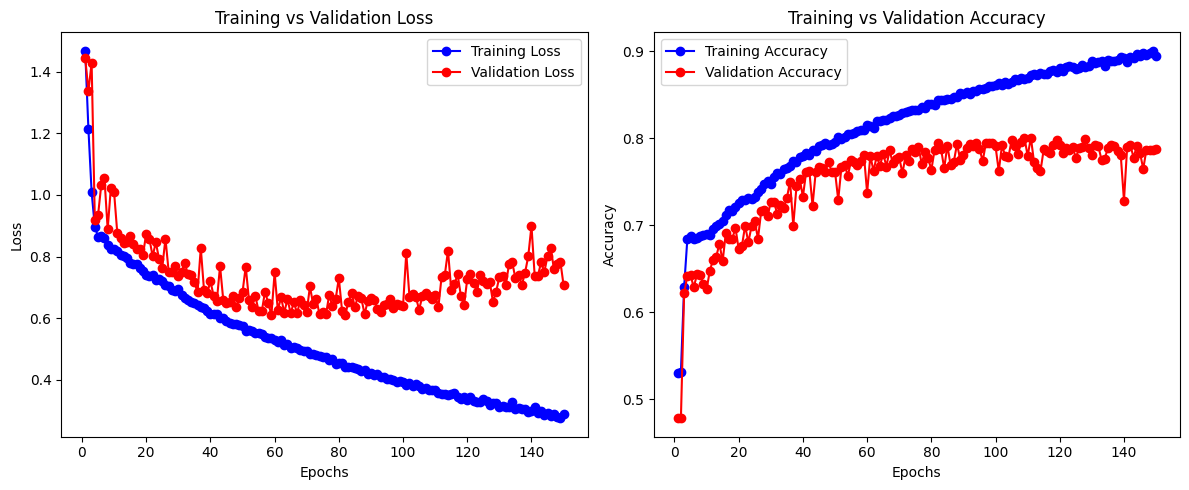

In [76]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-o', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [77]:
import matplotlib.pyplot as plt
import numpy as np

def show_prediction(model, image, true_mask, n_classes=6):

    if hasattr(image, "numpy"):
        image = image.numpy()
    if hasattr(true_mask, "numpy"):
        true_mask = true_mask.numpy()

    img_input = np.expand_dims(image, axis=0)

    pred_mask = model.predict(img_input)[0]
    pred_mask = np.argmax(pred_mask, axis=-1)

    plt.figure(figsize=(15,5))



    plt.subplot(1,3,2)
    plt.imshow(true_mask, cmap='jet', vmin=0, vmax=n_classes-1)
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(pred_mask, cmap='jet', vmin=0, vmax=n_classes-1)
    plt.title("Predicted Mask")
    plt.axis('off')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


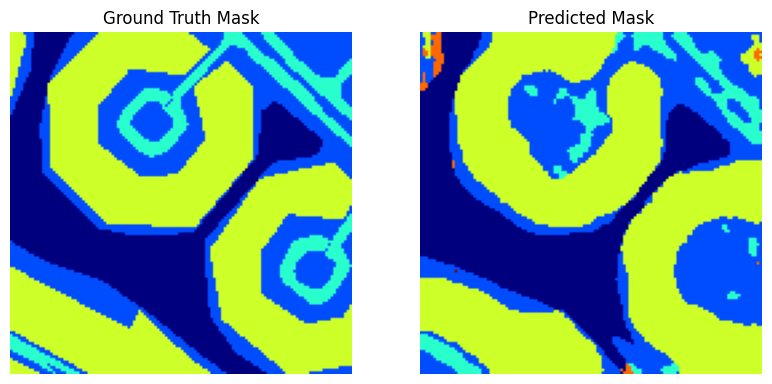

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


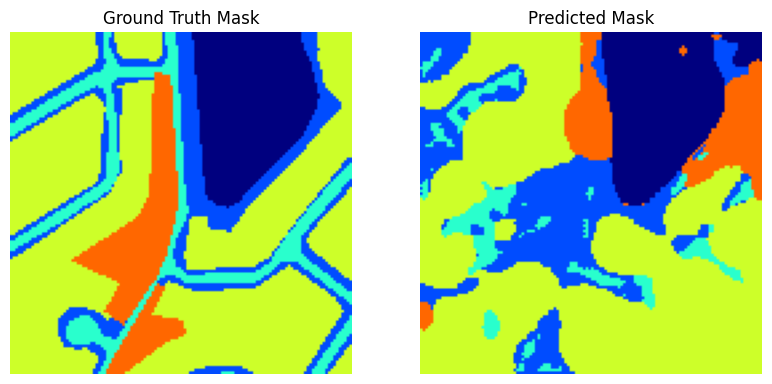

In [83]:
show_prediction(model, x_train_resized[0], y_train_sparse[0])
show_prediction(model, x_test_resized[0], y_test_sparse[0])
